<a href="https://colab.research.google.com/github/jrchac/Thesis-Project-Feele/blob/main/G2020_Scoring_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scoring System



## Cleaning Data

In [1]:
%config Completer.use_jedi = False

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
%run G2020_Cleaning_Data.ipynb   # this is where our functions are stored

data = cleaning() #it takes long to execute (4min30s)

In [ ]:
def translate_df(df):
  translation_dict = {
      'Niet oke': 'Not okay',
      'Oke': 'Okay',
      'Goed': 'Good',
      'Omgeving': 'Environment',
      'Leuke taak': 'Fun task',
      'Weet ik niet': 'I don\'t know',
      'Goede nacht': 'Good night',
      'Gesprek': 'Conversation',
      'Vakantie': 'Vacation',
      'Ontevreden': 'Dissatisfied',
      'Verrast': 'Surprised',
      'Vreugdevol': 'Joyful',
      'Nerveus': 'Nervous',
      'Kalm': 'Calm',
      'Blij': 'Happy',
      'Moe': 'Tired',
      'Angstig': 'Anxious',
      'Energiek': 'Energetic',
      'Verveeld': 'Bored',
      'Melig': 'Giggly',
      'Trots': 'Proud',
      'Boos': 'Angry',
      'Gefrustreerd': 'Frustrated',
      'Onverschillig': 'Indifferent',
      'Geliefd': 'Loved',
      'Feestelijk': 'Festive',
      'Verward': 'Confused',
      'Tevreden': 'Satisfied',
      'Geirriteerd': 'Irritated',
      'Geinteresseerd': 'Interested',
      'Somber': 'Gloomy',
      'Opgelaten': 'Embarrassed',
      'Verliefd': 'In love',
      'Teleurgesteld': 'Disappointed',
      'Bezorgd': 'Worried',
      'Verdrietig': 'Sad',
      'Bewondering': 'Admiration',
      'Ziek': 'Sick',
      'Oke nacht': 'Okay night',
      'Stress': 'Stress',
      'Sporten': 'Sports',
      'Compliment': 'Compliment',
      'Slecht nieuws': 'Bad news',
      'Selfcare': 'Self-care',
      'Rust': 'Rest',
      'Goed nieuws': 'Good news',
      'Eenzaam': 'Lonely',
      'Feest': 'Party',
      'Iets anders': 'Something else',
      'Matig nieuws': 'Moderate news',
      'Matige taak': 'Moderate task',
      'Iemand ontmoet': 'Met someone',
      'Agenda': 'Agenda',
      'Slechte nacht': 'Bad night',
      'Nieuwe relatie': 'New relationship',
      'Volle agenda': 'Busy schedule',
      'Ruzie': 'Argument',
      'Stomme taak': 'Stupid task',
      'Verrassing': 'Surprise',
      'Werken': 'Work',
      'Relaxen': 'Relaxing',
      'Eten/drinken': 'Eating/drinking',
      'Niets': 'Nothing',
      'Huiswerk': 'Homework',
      'Buiten zijn': 'Being outdoors',
      'Gamen': 'Gaming',
      'Visite/bezoek': 'Visiting',
      'Televisie': 'Television',
      'Klasgenoten': 'Classmates',
      'Alleen': 'Alone',
      'Relatie': 'Relationship',
      'Vrienden': 'Friends',
      'Collega’s': 'Colleagues',
      'Huisgenoten': 'Housemates',
      'Familie': 'Family',
      'Iemand anders': 'Someone else',
      'Gezin': 'Family',
      'Huisdieren': 'Pets',
      'Zeg ik niet': 'I won\'t say'
  }
  df['question_1'] = df['question_1'].map(translation_dict)
  df['question_2'] = df['question_2'].map(translation_dict)
  df['question_3'] = df['question_3'].map(translation_dict)
  df['question_4'] = df['question_4'].map(translation_dict)
  df['question_5'] = df['question_5'].map(translation_dict)

  return df

In [ ]:
def handling_nan_questions(df):
  cols = 'question_1', 'question_2', 'question_3', 'question_4', 'question_5'
  df = df[cols].fillna('NA')
  return df

In [ ]:
data = translate_df(data)

In [ ]:
handling_nan_questions(data)

KeyError: ('question_1', 'question_2', 'question_3', 'question_4', 'question_5')

In [ ]:
# creating a new column to differentiate between young adults and adults (24+)
data['youth'] = data['response_age'].apply(lambda x: 1 if x < 25 else 0)

In [ ]:
# only users with steps
step_data = data[data['daily_step'] != -1]
good_data = step_data[step_data['question_1'] == 'Goed']
okay_data = step_data[step_data['question_1'] == 'Oke']
not_okay_data = step_data[step_data['question_1'] == 'Niet oke']

# only users without steps
no_step_data = data[data['daily_step'] == -1]
good_ws = no_step_data[no_step_data['question_1'] == 'Goed']
okay_ws = no_step_data[no_step_data['question_1'] == 'Oke']
not_okay_ws = no_step_data[no_step_data['question_1'] == 'Niet oke']

In [ ]:
# only young adults with steps
youth_data = step_data[step_data['youth'] == 1]
# only adults (+24) with steps
adult_data = step_data[step_data['youth'] == 0]

In [ ]:
# users by gender
she_data = step_data[step_data['gender']=='she']
he_data = step_data[step_data['gender']=='he']
them_data  =step_data[step_data['gender']=='them']
na_data = step_data[step_data['gender']=='not_say']

In [ ]:
data.columns

Index(['user_id', 'gender', 'birthday', 'Date', 'Time', 'DateTime',
       'question_1', 'question_2', 'question_3', 'question_4', 'question_5',
       'response_age', 'daily_step', 'youth'],
      dtype='object')

In [ ]:
data['question_1'].value_counts()

question_1
Good        24460
Okay        23696
Not okay    11117
Name: count, dtype: int64

In [ ]:
temp = data[['gender', 'question_1', 'question_2', 'question_3', 'question_4', 'question_5',
      'response_age', 'daily_step', 'youth']]

In [ ]:
temp.head()

,gender,question_1,question_2,question_3,question_4,question_5,response_age,daily_step,youth
0,she,Not okay,Dissatisfied,Sick,Something else,Classmates,27,2485,0
1,she,Okay,Surprised,NaN,NaN,NaN,27,6237,0
2,she,Okay,Surprised,Okay night,Work,Classmates,27,6237,0
3,she,Good,Joyful,NaN,NaN,NaN,27,5379,0
4,she,Not okay,Nervous,Stress,Work,Alone,27,6025,0


In [ ]:
temp['question_5'].value_counts()

question_5
Alone           26208
Family          11046
Relationship     5500
Friends          4097
Colleagues       3779
Pets             2039
Classmates       1874
Someone else     1230
Housemates        954
I won't say       137
Name: count, dtype: int64

## Scoring System

Scoring system:

- Create a score system for each question
- Bag different emotions/ actions into categories
- Find a way to use the scores plus the activity data to create a profile

In [ ]:
# Define the bags of emotions
serene = ["Calm", "Satisfied", "Happy", "Joyful", "Proud", "Loved", "Festive", "In love", "Giggly", "Admiration"]
energetic = ["Energetic", "Giggly", "Happy", "Joyful", "Festive", "Proud", "Interested", "In love", "Surprised"]
somber = ["Tired", "Gloomy", "Sad", "Bored", "Confused", "Embarrassed", "Frustrated", "Irritated", "Anxious", "Disappointed"]
equilibrium = ["Indifferent", "Calm", "Satisfied", "Happy", "Interested", "Surprised", "Proud", "Loved", "Admiration"]
turbulent = ["Confused", "Nervous", "Worried", "Dissatisfied", "Anxious", "Disappointed", "Angry", "Irritated", "Frustrated", "Embarrassed"]



In [ ]:
col = ['question_1', 'question_5']

data[col].value_counts()

question_1  question_5  
Okay        Alone           11803
Good        Alone            8311
Not okay    Alone            6094
Good        Family           5358
Okay        Family           4021
Good        Friends          2699
            Relationship     2674
Okay        Relationship     1964
Good        Colleagues       1866
Not okay    Family           1667
Okay        Colleagues       1456
            Friends          1045
Not okay    Relationship      862
Okay        Classmates        818
Good        Pets              816
Okay        Pets              798
Good        Classmates        654
            Someone else      622
            Housemates        474
Not okay    Colleagues        457
            Pets              425
Okay        Someone else      415
Not okay    Classmates        402
            Friends           353
Okay        Housemates        340
Not okay    Someone else      193
            Housemates        140
Okay        I won't say        47
Not okay    I won't say

## Cluster (again)

In [ ]:
step_data = step_data.drop(index = step_data[step_data['daily_step'] == 110186].index)

<ipython-input-79-520372a25a86>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_columns['question_1_encoded'] = label_encoder_1.fit_transform(relevant_columns['question_1'])
<ipython-input-79-520372a25a86>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_columns['question_5_encoded'] = label_encoder_2.fit_transform(relevant_columns['question_5'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'aut

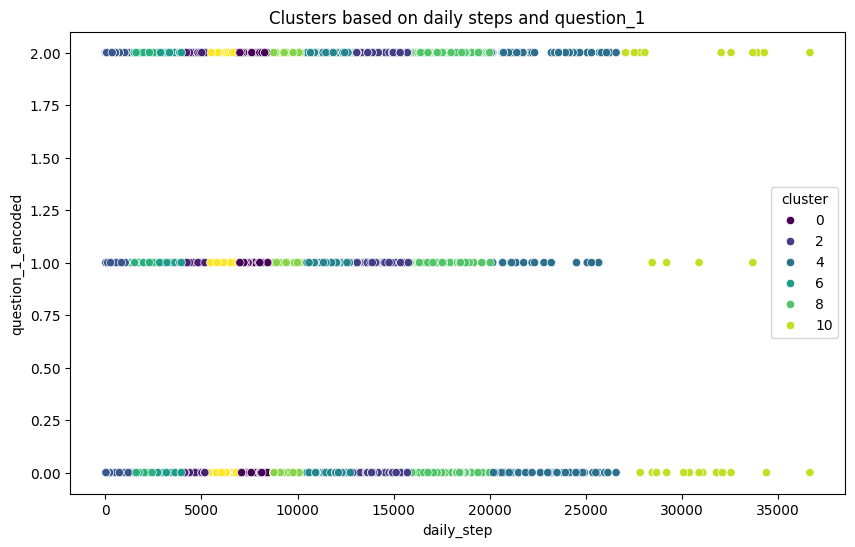

In [ ]:
# Convert categorical columns to numerical
col = ['question_1', 'question_5', 'daily_step', 'youth']

label_encoder_1 = LabelEncoder()
relevant_columns = step_data[col]
relevant_columns['question_1_encoded'] = label_encoder_1.fit_transform(relevant_columns['question_1'])

label_encoder_2 = LabelEncoder()
relevant_columns['question_5_encoded'] = label_encoder_2.fit_transform(relevant_columns['question_5'])

# Drop the original categorical columns
relevant_columns = relevant_columns.drop(columns=['question_1', 'question_5'])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(relevant_columns)

# Add cluster labels to the dataframe
relevant_columns['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daily_step', y='question_1_encoded', hue='cluster', data=relevant_columns, palette='viridis')
plt.title('Clusters based on daily steps and question_1')
plt.show()

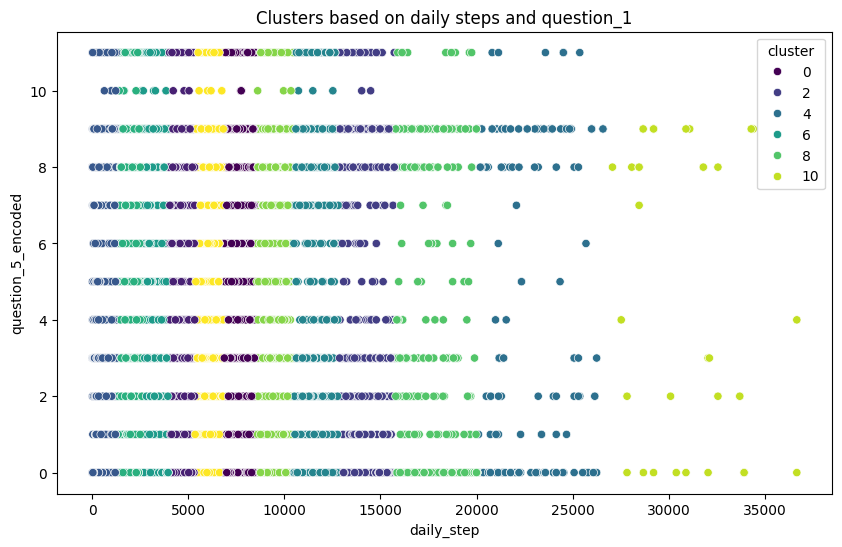

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='daily_step', y='question_5_encoded', hue='cluster', data=relevant_columns, palette='viridis')
plt.title('Clusters based on daily steps and question_1')
plt.show()

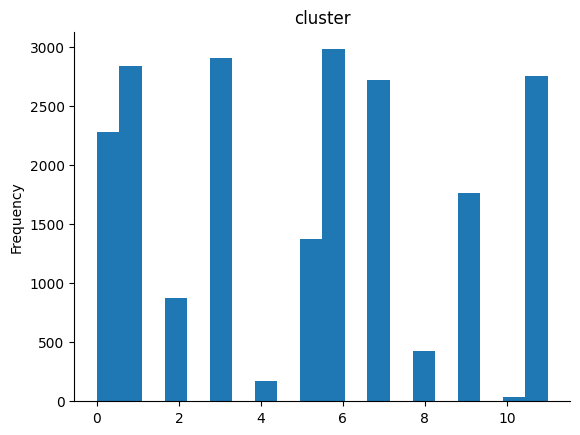

In [ ]:
# @title cluster

from matplotlib import pyplot as plt
relevant_columns['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

# investigating the clusters

           daily_step                                         youth         \
                 mean   median          std    min    max      mean median   
cluster                                                                      
0         7633.047285   7617.0   484.693251   6843   8514  0.616025    1.0   
1         4626.341661   4625.0   397.313089   3952   5336  0.587966    1.0   
2        14141.435080  14023.0   838.339855  12832  15767  0.579727    1.0   
3          644.223254    621.0   384.269276      0   1315  0.621947    1.0   
4        22660.195266  22193.0  1909.760142  20086  26582  0.485207    0.0   
5        11511.038462  11460.0   679.219211  10459  12812  0.639332    1.0   
6         3290.486749   3281.0   370.539986   2636   3948  0.572291    1.0   
7         1993.316563   2006.0   377.075245   1317   2635  0.562982    1.0   
8        17422.474299  17256.0  1209.675417  15788  20035  0.633178    1.0   
9         9403.664963   9354.0   529.410161   8516  10454  0.614

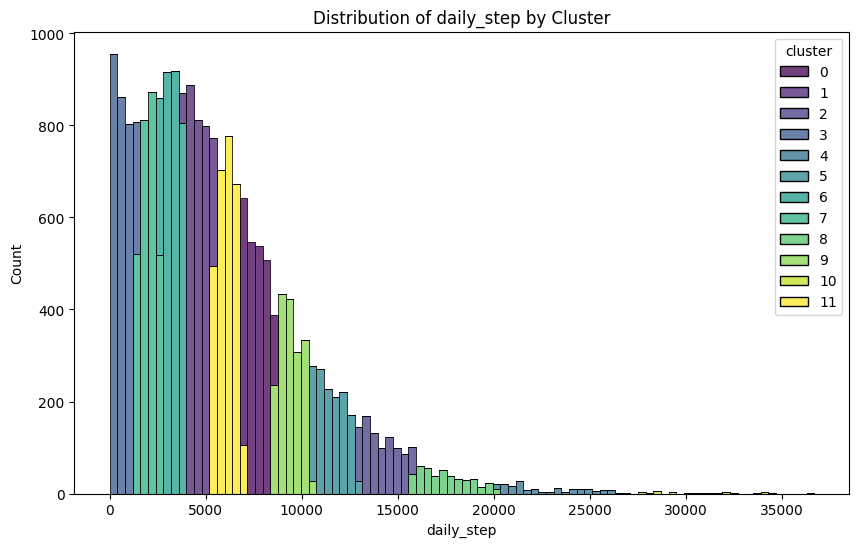

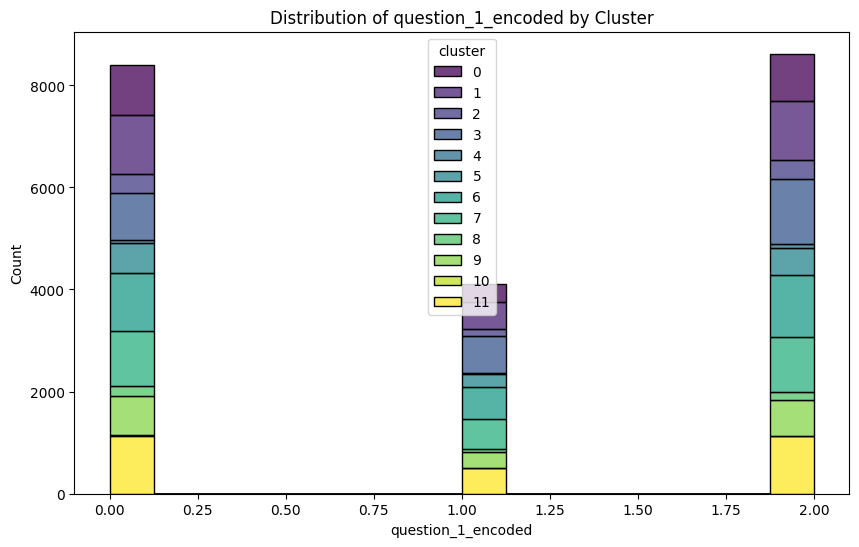

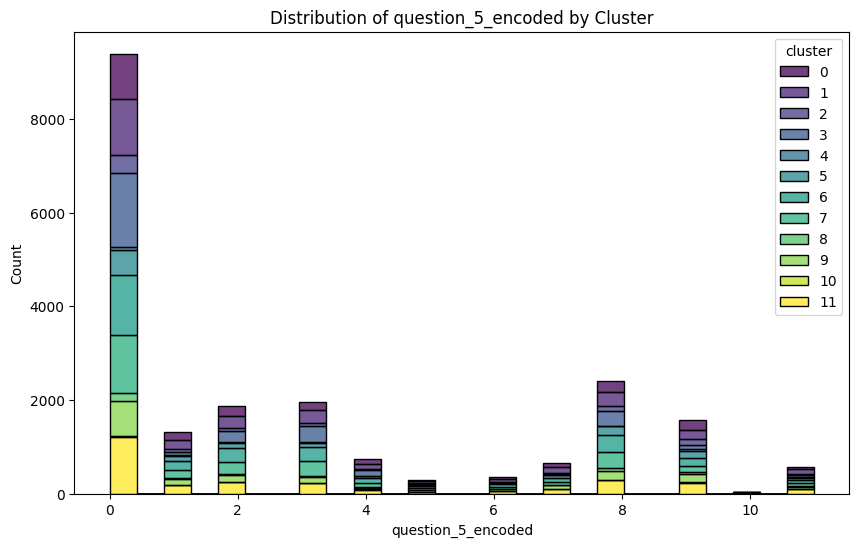

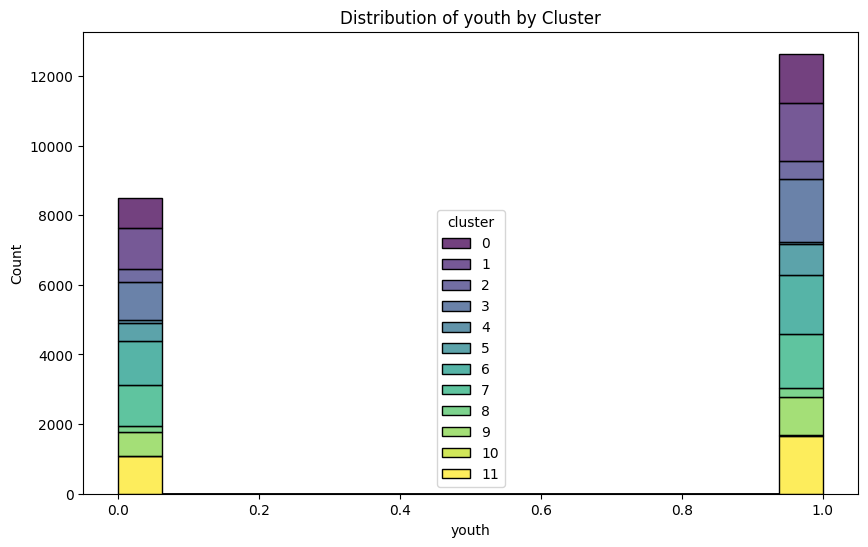

<ipython-input-86-4bd9c950f5e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=relevant_columns, palette='viridis')


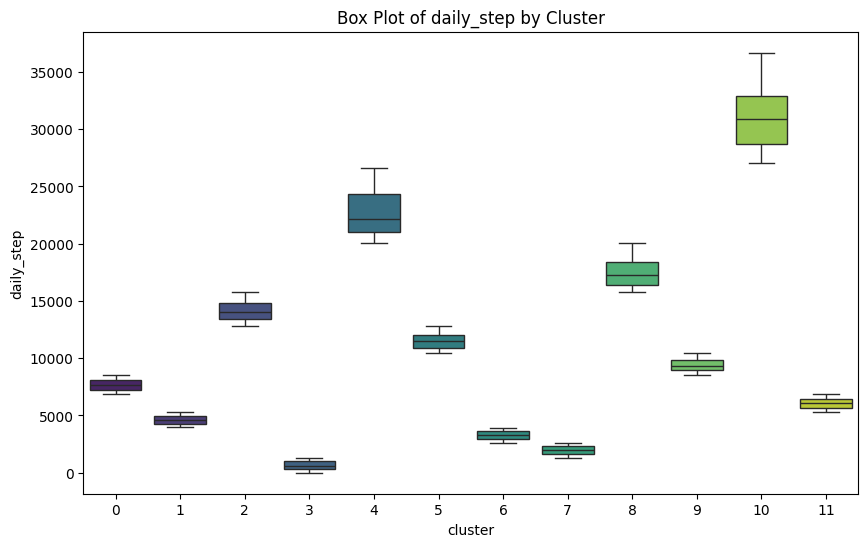

<ipython-input-86-4bd9c950f5e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=relevant_columns, palette='viridis')


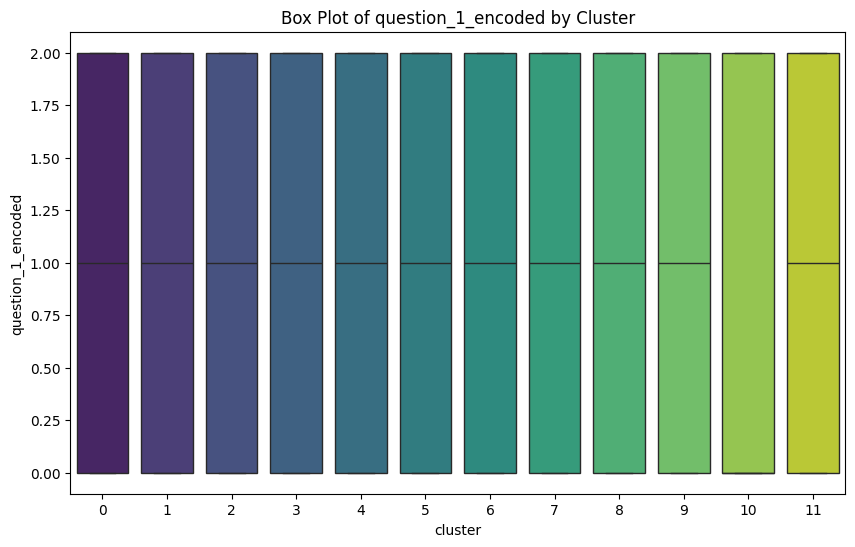

<ipython-input-86-4bd9c950f5e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=relevant_columns, palette='viridis')


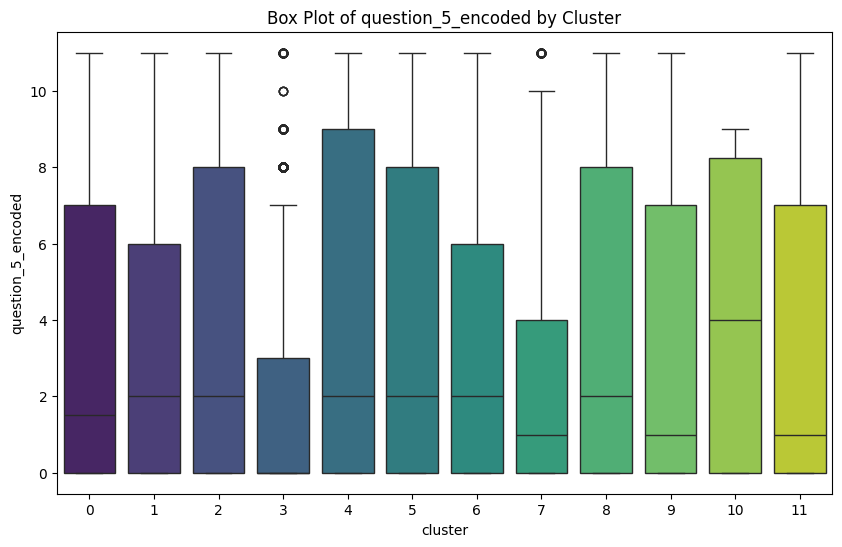

<ipython-input-86-4bd9c950f5e1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=relevant_columns, palette='viridis')


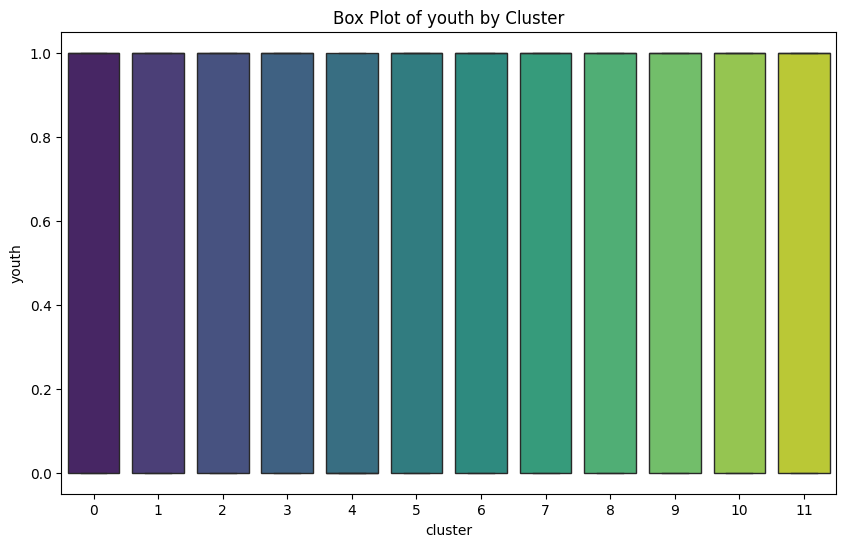

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Add cluster labels to the dataframe
relevant_columns['cluster'] = kmeans.labels_

# Compute and display cluster summary statistics
cluster_summary = relevant_columns.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])
print(cluster_summary)

# Visualize the distributions of each feature within clusters
features = ['daily_step', 'question_1_encoded', 'question_5_encoded', 'youth']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=relevant_columns, x=feature, hue='cluster', multiple='stack', palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=relevant_columns, palette='viridis')
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()


In [ ]:
# Examine cluster centroids
# centroids = kmeans.cluster_centers_
# centroid_df = pd.DataFrame(centroids, columns=['question_1_encoded', 'question_5_encoded', 'daily_step'])
# print(centroid_df)

# # Reverse the label encoding for better interpretation
# centroid_df['question_1'] = label_encoder_1.inverse_transform(centroid_df['question_1_encoded'].astype(int))
# centroid_df['question_5'] = label_encoder_2.inverse_transform(centroid_df['question_5_encoded'].astype(int))
# print(centroid_df)

# # Identify feature importance using a Random Forest classifier
# X = relevant_columns[['daily_step', 'question_1_encoded', 'question_5_encoded']]
# y = relevant_columns['cluster']

# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X, y)

# feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
# print(feature_importances.sort_values(ascending=False))

In [ ]:
file = 'young_step_nobirthday.xlsx'

clusters = pd.read_excel(file)
clusters.columns

Index(['Unnamed: 0', 'user_id', 'gender', 'birthday', 'd6_response_age',
       'd0_question_1', 'd1_question_1', 'd2_question_1', 'd3_question_1',
       'd4_question_1', 'd5_question_1', 'd6_question_1', 'd0_question_2',
       'd1_question_2', 'd2_question_2', 'd3_question_2', 'd4_question_2',
       'd5_question_2', 'd6_question_2', 'd0_question_3', 'd1_question_3',
       'd2_question_3', 'd3_question_3', 'd4_question_3', 'd5_question_3',
       'd6_question_3', 'd0_question_4', 'd1_question_4', 'd2_question_4',
       'd3_question_4', 'd4_question_4', 'd5_question_4', 'd6_question_4',
       'd0_question_5', 'd1_question_5', 'd2_question_5', 'd3_question_5',
       'd4_question_5', 'd5_question_5', 'd6_question_5', 'd6_label',
       'd0_daily_step', 'd1_daily_step', 'd2_daily_step', 'd3_daily_step',
       'd4_daily_step', 'd5_daily_step', 'd6_daily_step'],
      dtype='object')

(array([211., 206.,   0., 362.,   0., 385., 366.,   0.,  78., 122.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

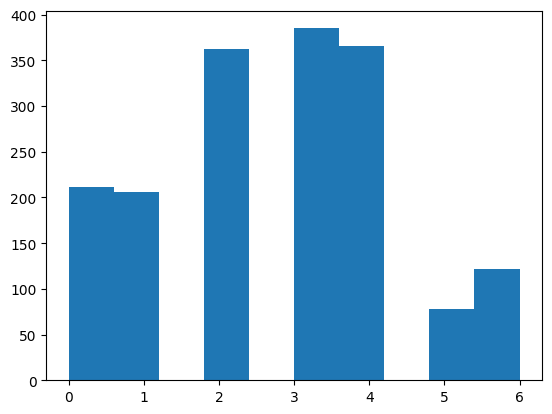

In [ ]:
plt.hist(clusters['d6_label'])

In [ ]:
clusters

,Unnamed: 0,user_id,gender,birthday,d6_response_age,d0_question_1,d1_question_1,d2_question_1,d3_question_1,d4_question_1,...,d5_question_5,d6_question_5,d6_label,d0_daily_step,d1_daily_step,d2_daily_step,d3_daily_step,d4_daily_step,d5_daily_step,d6_daily_step
0,0,0_1059,them,2003,19,Niet oke,Goed,Oke,Niet oke,Oke,...,Alleen,Alleen,2,261,6375,6298,3291,505,602,6199
1,1,1000_7015,he,2005,17,Oke,Oke,Oke,Oke,Goed,...,Collega’s,Alleen,1,12359,2290,3366,1947,1857,4584,584
2,2,1001_7073,she,2008,14,Goed,Goed,Goed,Goed,Goed,...,Alleen,Alleen,0,5522,7313,3492,5481,7478,3187,1725
3,3,1002_7073,she,2008,14,Goed,Goed,Goed,Goed,Goed,...,Alleen,Alleen,0,1262,5522,7313,3492,5481,7478,3187
4,4,1003_7073,she,2008,14,Oke,Goed,Goed,Goed,Goed,...,Alleen,Alleen,2,6922,1262,5522,7313,3492,5481,7478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1725,997_6971,she,1998,24,Oke,Niet oke,Goed,Oke,Niet oke,...,Huisdieren,Collega’s,4,19351,22294,6356,14086,11079,10312,21097
1726,1726,998_6971,she,1998,24,Goed,Oke,Niet oke,Goed,Oke,...,Alleen,Huisdieren,4,10144,19351,22294,6356,14086,11079,10312
1727,1727,999_7015,he,2005,17,Oke,Oke,Oke,Goed,Goed,...,Alleen,Alleen,1,2290,3366,1947,1857,4584,584,8010
1728,1728,99_1072,he,2004,18,Niet oke,Niet oke,Niet oke,Niet oke,Oke,...,Gezin,Gezin,1,5021,2369,11302,9098,14605,15532,11837
